# Technical Tutorial: From Mathematical Vectors to Semantic Search

This Jupyter Notebook guides you through the journey from mathematical vectors to AI-driven semantic search. It covers vector representations, similarity metrics (Euclidean distance and cosine similarity), text vectorization (Bag of Words, TF-IDF, embeddings), and their application in retrieval search, with hands-on code examples using GloVe and Sentence-BERT.

## What Are Vectors?

A **vector** is a mathematical object that represents both magnitude and direction. In the context of retrieval search and AI, vectors are typically lists of numbers that represent data points in a multi-dimensional space. Each number in the vector corresponds to a coordinate in that space, allowing us to quantify and compare data such as words, sentences, or documents.

For example:
- A 2D vector like `[3, 4]` can represent a point in a 2D plane, with `3` as the x-coordinate and `4` as the y-coordinate.
- In AI, vectors are used to encode information, such as the meaning of words or features of an image, into numerical form for computational processing.

Vectors are fundamental in retrieval search because they allow us to represent complex data (e.g., text) in a format that algorithms can analyze, compare, and rank.

Vector 1: [3 4]
Vector 2: [1 2]


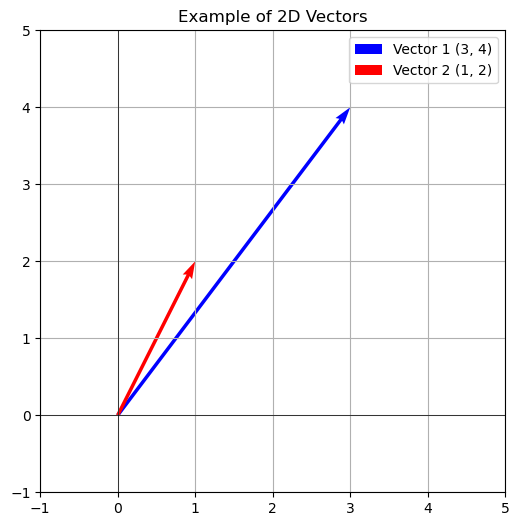

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define example vectors
vector1 = np.array([3, 4])  # 2D vector
vector2 = np.array([1, 2])  # Another 2D vector

# Print vectors
print("Vector 1:", vector1)
print("Vector 2:", vector2)

# Visualize vectors in 2D space
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, vector1[0], vector1[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector 1 (3, 4)')
plt.quiver(0, 0, vector2[0], vector2[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector 2 (1, 2)')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title("Example of 2D Vectors")
plt.legend()
plt.show()

### Example of Vectors

In the code above, we created two 2D vectors: `[3, 4]` and `[1, 2]`. These are represented as arrows in a 2D plane, starting from the origin `(0, 0)`. The visualization shows:
- **Vector 1 (blue)**: Points to `(3, 4)`, indicating a magnitude and direction.
- **Vector 2 (red)**: Points to `(1, 2)`, showing a different position in the same space.

In retrieval search, vectors might represent more complex data, such as a document’s features or a word’s semantic meaning, in higher-dimensional spaces (e.g., 100 or 300 dimensions).

In [3]:
# Example of vector addition
vector_sum = vector1 + vector2
print("Sum of Vector 1 and Vector 2:", vector_sum)

Sum of Vector 1 and Vector 2: [4 6]


Vectors are the building blocks for representing data in retrieval search systems. By converting text, images, or other data into vectors, we can measure similarities between them, enabling tasks like finding relevant documents or recommending similar items.

## Euclidean Distance and Cosine Similarity

In retrieval search, we measure how similar two data points (e.g., documents or words) are by comparing their vector representations. Two common methods for this are **Euclidean distance** and **cosine similarity**.

### Euclidean Distance
Euclidean distance measures the straight-line distance between two vectors in a multi-dimensional space. It's intuitive, like measuring the physical distance between two points on a map.

**Formula**:
For two vectors **a** = [a₁, a₂, ..., aₙ] and **b** = [b₁, b₂, ..., bₙ], the Euclidean distance is:

$$d(\mathbf{a}, \mathbf{b}) = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2 + \ldots + (a_n - b_n)^2}$$

- A **smaller** Euclidean distance indicates that the vectors are closer and more similar.
- It's sensitive to the magnitude of the vectors.

### Cosine Similarity
Cosine similarity measures the cosine of the angle between two vectors, focusing on their direction rather than magnitude. It's useful for comparing items like text, where the angle between vectors reflects similarity in meaning.

**Formula**:

$$\text{cosine similarity}(\mathbf{a}, \mathbf{b}) = \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{a}\| \|\mathbf{b}\|} = \frac{\sum_{i=1}^n a_i b_i}{\sqrt{\sum_{i=1}^n a_i^2} \sqrt{\sum_{i=1}^n b_i^2}}$$

- The result ranges from -1 (opposite), 0 (perpendicular), to 1 (identical). A **higher** cosine similarity means more similar vectors.
- It's invariant to vector magnitude, making it ideal for text data where length varies.

Both methods are widely used in retrieval search to rank items (e.g., documents) based on their similarity to a query.

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

# Define sample vectors
vector1 = np.array([3, 4])
vector2 = np.array([1, 2])
vector3 = np.array([6, 8])  # Similar direction to vector1, different magnitude

# Euclidean distance
def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2))

# Calculate distances
dist_1_2 = euclidean_distance(vector1, vector2)
dist_1_3 = euclidean_distance(vector1, vector3)

# Cosine similarity
cos_sim_1_2 = cosine_similarity(vector1.reshape(1, -1), vector2.reshape(1, -1))[0][0]
cos_sim_1_3 = cosine_similarity(vector1.reshape(1, -1), vector3.reshape(1, -1))[0][0]

# Print results
print("Vectors:")
print("Vector 1:", vector1)
print("Vector 2:", vector2)
print("Vector 3:", vector3)
print("\nEuclidean Distances:")
print("Between Vector 1 and Vector 2:", dist_1_2)
print("Between Vector 1 and Vector 3:", dist_1_3)
print("\nCosine Similarities:")
print("Between Vector 1 and Vector 2:", cos_sim_1_2)
print("Between Vector 1 and Vector 3:", cos_sim_1_3)

Vectors:
Vector 1: [3 4]
Vector 2: [1 2]
Vector 3: [6 8]

Euclidean Distances:
Between Vector 1 and Vector 2: 2.8284271247461903
Between Vector 1 and Vector 3: 5.0

Cosine Similarities:
Between Vector 1 and Vector 2: 0.9838699100999074
Between Vector 1 and Vector 3: 1.0


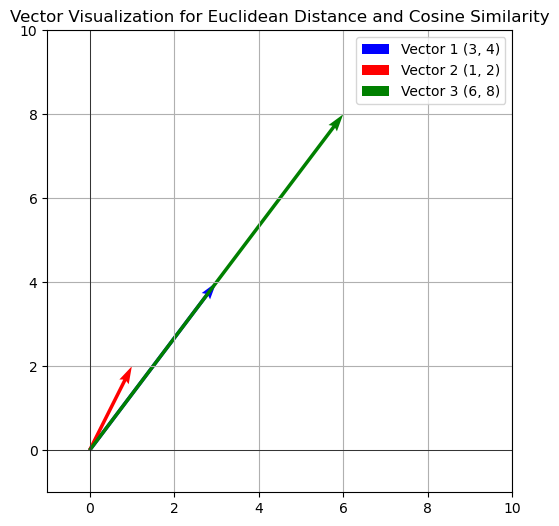

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.quiver(0, 0, vector1[0], vector1[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector 1 (3, 4)')
plt.quiver(0, 0, vector2[0], vector2[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector 2 (1, 2)')
plt.quiver(0, 0, vector3[0], vector3[1], angles='xy', scale_units='xy', scale=1, color='g', label='Vector 3 (6, 8)')
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("Vector Visualization for Euclidean Distance and Cosine Similarity")
plt.legend()
plt.show()

### Example: Calculating Euclidean Distance and Cosine Similarity

In the code above, we used three 2D vectors:
- **Vector 1**: `[3, 4]`
- **Vector 2**: `[1, 2]`
- **Vector 3**: `[6, 8]` (same direction as Vector 1, but twice the magnitude)

**Results**:
- **Euclidean Distance**:
  - Vector 1 and Vector 2: The distance is larger because they are farther apart in space.
  - Vector 1 and Vector 3: The distance is smaller, but still non-zero due to magnitude differences.
- **Cosine Similarity**:
  - Vector 1 and Vector 2: The similarity is less than 1 because their directions differ.
  - Vector 1 and Vector 3: The similarity is 1 (or very close) because they point in the same direction, despite different magnitudes.

This highlights a key difference: Euclidean distance considers both direction and magnitude, while cosine similarity focuses only on direction. In retrieval search, cosine similarity is often preferred for text data, as document length (magnitude) may not reflect relevance.

## Real-Life Examples of Euclidean Distance and Cosine Similarity

Euclidean distance and cosine similarity are widely used in retrieval search and related fields to measure how similar two data points are. Below are real-world examples of how these methods are applied.

### Euclidean Distance in Real Life
Euclidean distance is intuitive for applications where physical or absolute differences matter. Examples include:

1. **Geographic Navigation**:
   - **Scenario**: A ride-sharing app needs to find the nearest driver to a passenger’s location.
   - **How It Works**: The app represents the passenger and driver locations as 2D vectors (latitude, longitude). Euclidean distance calculates the straight-line distance between these points to identify the closest driver.
   - **Example**: If a passenger is at `[40.7128, -74.0060]` (New York City) and a driver is at `[40.7300, -73.9350]`, the Euclidean distance determines the physical proximity.

2. **Image Recognition**:
   - **Scenario**: A facial recognition system compares two face images to determine if they are the same person.
   - **How It Works**: Each image is converted into a vector of pixel intensities or features (e.g., distances between facial landmarks). Euclidean distance measures how similar the feature vectors are, with smaller distances indicating a closer match.
   - **Example**: Two images of the same person will have a smaller Euclidean distance than images of different people.

### Cosine Similarity in Real Life
Cosine similarity excels in applications where the direction (or pattern) of data matters more than magnitude, especially in text-based retrieval.

1. **Document Retrieval in Search Engines**:
   - **Scenario**: A search engine retrieves documents relevant to a user’s query, such as “best AI tools.”
   - **How It Works**: The query and documents are represented as vectors (e.g., using word embeddings). Cosine similarity measures how closely aligned the query vector is to each document vector, ranking documents with higher similarity as more relevant.
   - **Example**: A query like “AI tools” will have high cosine similarity with a document about “machine learning software” but lower similarity with one about “gardening tips.”

2. **Recommendation Systems**:
   - **Scenario**: A streaming service like Netflix recommends movies based on a user’s viewing history.
   - **How It Works**: User preferences and movie features (e.g., genres, actors) are encoded as vectors. Cosine similarity compares the user’s preference vector to movie vectors to suggest similar content.
   - **Example**: If a user enjoys action movies, their preference vector will have high cosine similarity with vectors of action movie profiles.

These examples show how Euclidean distance is suited for absolute measurements (e.g., physical distance or exact feature differences), while cosine similarity is ideal for comparing patterns or meanings (e.g., text or user preferences) in retrieval search.

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

# Example 1: Euclidean Distance for Geographic Locations
passenger = np.array([40.7128, -74.0060])  # New York City
driver1 = np.array([40.7300, -73.9350])   # Nearby location
driver2 = np.array([34.0522, -118.2437])  # Los Angeles

def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2))

print("Euclidean Distance Example (Geographic Locations):")
print("Distance between passenger and driver 1:", euclidean_distance(passenger, driver1))
print("Distance between passenger and driver 2:", euclidean_distance(passenger, driver2))

# Example 2: Cosine Similarity for Text Documents
documents = [
    "AI tools for machine learning",
    "Best AI software for developers",
    "Gardening tips for beginners"
]
query = ["AI tools for developers"]

# Convert text to vectors using CountVectorizer
vectorizer = CountVectorizer()
doc_vectors = vectorizer.fit_transform(documents + query).toarray()
query_vector = doc_vectors[-1].reshape(1, -1)
doc_vectors = doc_vectors[:-1]

# Calculate cosine similarities
similarities = cosine_similarity(query_vector, doc_vectors)[0]

print("\nCosine Similarity Example (Text Documents):")
for i, doc in enumerate(documents):
    print(f"Similarity between query and document '{doc}': {similarities[i]:.4f}")

Euclidean Distance Example (Geographic Locations):
Distance between passenger and driver 1: 0.07305367889435517
Distance between passenger and driver 2: 44.736312919707636

Cosine Similarity Example (Text Documents):
Similarity between query and document 'AI tools for machine learning': 0.6708
Similarity between query and document 'Best AI software for developers': 0.6708
Similarity between query and document 'Gardening tips for beginners': 0.2500


### Example: Real-Life Applications

In the code above, we demonstrated two real-life scenarios:

1. **Euclidean Distance (Geographic Locations)**:
   - We calculated the distance between a passenger’s location in New York City and two drivers’ locations (one nearby and one in Los Angeles).
   - The smaller distance to Driver 1 indicates they are closer and more relevant for a ride-sharing app.

2. **Cosine Similarity (Text Documents)**:
   - We compared a query (“AI tools for developers”) to three documents using simple word count vectors.
   - Documents about “AI tools” and “AI software” have higher cosine similarity to the query than the unrelated “gardening tips” document, reflecting their relevance.

These examples mimic retrieval search tasks: Euclidean distance helps in spatial or feature-based matching, while cosine similarity excels in text-based or pattern-based matching.

## How Euclidean Distance and Cosine Similarity Are Useful in Retrieval Search

Retrieval search involves finding and ranking items (e.g., documents, images, or products) that are most relevant to a user’s query. Both **Euclidean distance** and **cosine similarity** are critical for comparing vector representations of queries and items, enabling efficient and accurate retrieval. Here’s how they are used:

### Euclidean Distance in Retrieval Search
- **Use Case**: Euclidean distance is ideal when the absolute difference between data points matters, such as in spatial or feature-based searches.
- **How It Works**: In retrieval search, items and queries are represented as vectors in a multi-dimensional space. Euclidean distance measures the straight-line distance between these vectors, with smaller distances indicating higher similarity (and thus higher relevance).
- **Applications**:
  - **Geospatial Search**: Finding the nearest locations (e.g., restaurants or stores) to a user’s coordinates.
  - **Feature Matching**: Comparing numerical feature vectors, such as in image or audio retrieval, where exact differences in features (e.g., pixel intensities) are important.
- **Limitations**: Euclidean distance is sensitive to the magnitude of vectors, which can be problematic for text data where document length varies. For example, a longer document may have a larger vector magnitude, leading to larger distances even if it’s relevant.

### Cosine Similarity in Retrieval Search
- **Use Case**: Cosine similarity is preferred for text-based and semantic searches where the direction (or pattern) of vectors matters more than their magnitude.
- **How It Works**: Cosine similarity measures the cosine of the angle between two vectors, focusing on their orientation. A value closer to 1 indicates high similarity, making it ideal for ranking items based on relevance to a query.
- **Applications**:
  - **Text Retrieval**: Search engines use cosine similarity to rank documents based on their relevance to a query, often with vector representations like TF-IDF or word embeddings.
  - **Recommendation Systems**: Platforms like e-commerce or streaming services use cosine similarity to recommend items by comparing user preference vectors to item vectors.
- **Advantages**: It’s robust to differences in vector magnitude, making it suitable for text data where document length doesn’t necessarily indicate relevance.

### Why They Matter
- **Euclidean Distance**: Provides a precise measure for applications where physical or absolute differences are critical, ensuring accurate matching in structured data scenarios.
- **Cosine Similarity**: Enables semantic understanding by focusing on the alignment of vectors, which is crucial for natural language processing and AI-driven search systems.
- Together, these methods allow retrieval systems to handle diverse data types, from numerical features to text, bridging mathematics to AI applications.

In [32]:
# Sample data: documents and a query
documents = [
    "Machine learning is transforming AI",
    "AI tools for data science",
    "Gardening tips for beginners"
]
query = ["AI and machine learning tools"]

# Convert text to vectors using CountVectorizer
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(documents + query).toarray()
query_vector = vectors[-1].reshape(1, -1)
doc_vectors = vectors[:-1]

# Calculate Euclidean distances
def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2))

euclidean_distances = [euclidean_distance(query_vector[0], doc_vector) for doc_vector in doc_vectors]

# Calculate cosine similarities
cosine_similarities = cosine_similarity(query_vector, doc_vectors)[0]

# Print results
print("Retrieval Search Example:")
print("\nQuery:", query[0])
print("\nDocuments:")
for i, doc in enumerate(documents):
    print(f"Document {i+1}: {doc}")
    print(f"Euclidean Distance: {euclidean_distances[i]:.4f}")
    print(f"Cosine Similarity: {cosine_similarities[i]:.4f}\n")

Retrieval Search Example:

Query: AI and machine learning tools

Documents:
Document 1: Machine learning is transforming AI
Euclidean Distance: 2.0000
Cosine Similarity: 0.6000

Document 2: AI tools for data science
Euclidean Distance: 2.4495
Cosine Similarity: 0.4000

Document 3: Gardening tips for beginners
Euclidean Distance: 3.0000
Cosine Similarity: 0.0000



### Example: Retrieval Search with Euclidean Distance and Cosine Similarity

In the code above, we simulated a retrieval search task:
- **Query**: “AI and machine learning tools”
- **Documents**: Three short texts, two related to AI and one about gardening.
- **Method**: We converted the query and documents into vectors using word counts (CountVectorizer) and computed:
  - **Euclidean Distance**: Smaller values indicate higher similarity.
  - **Cosine Similarity**: Higher values (closer to 1) indicate higher similarity.

**Observations**:
- Documents about “machine learning” and “AI tools” have lower Euclidean distances and higher cosine similarities to the query, indicating relevance.
- The gardening document has a larger Euclidean distance and lower cosine similarity, correctly indicating it’s less relevant.
- Cosine similarity often performs better for text retrieval because it ignores document length (vector magnitude), focusing on word patterns.

This example shows how retrieval search systems use these metrics to rank items, with cosine similarity being more common in text-based AI applications due to its focus on semantic alignment.

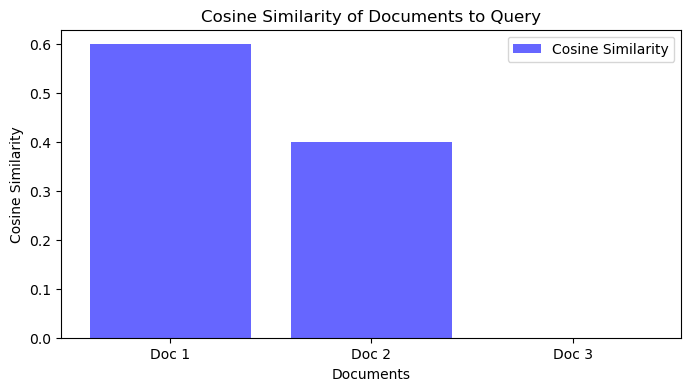

In [33]:
# Plot cosine similarities
plt.figure(figsize=(8, 4))
plt.bar(range(len(documents)), cosine_similarities, color='blue', alpha=0.6, label='Cosine Similarity')
plt.xticks(range(len(documents)), [f"Doc {i+1}" for i in range(len(documents))])
plt.title("Cosine Similarity of Documents to Query")
plt.ylabel("Cosine Similarity")
plt.xlabel("Documents")
plt.legend()
plt.show()

By using Euclidean distance and cosine similarity, retrieval search systems transform mathematical concepts into practical AI tools. These metrics enable machines to “understand” and rank data, paving the way for advanced techniques like semantic search.

## Bag of Words, TF-IDF, and Embeddings in Retrieval Search

To perform retrieval search on text data, we need to convert words, sentences, or documents into numerical vectors that algorithms can process. Three common approaches for this are **Bag of Words (BoW)**, **Term Frequency-Inverse Document Frequency (TF-IDF)**, and **embeddings**. Each method transforms text into vectors but differs in complexity and ability to capture meaning.

### Bag of Words (BoW)
- **Concept**: BoW represents a document as a vector of word counts, ignoring word order and grammar. Each unique word in a collection (corpus) becomes a dimension in the vector, and the value is the frequency of that word in the document.
- **Example**: For the sentence “I like to code, I code daily,” the BoW vector might count occurrences of words like “I,” “like,” “code,” etc.
- **Strengths**:
  - Simple and computationally efficient.
  - Works well for basic retrieval tasks where word frequency matters.
- **Limitations**:
  - Ignores word order and context (e.g., “dog bites man” vs. “man bites dog”).
  - Produces high-dimensional, sparse vectors (many zeros).
  - Doesn’t capture semantic meaning.

### TF-IDF (Term Frequency-Inverse Document Frequency)
- **Concept**: TF-IDF improves on BoW by weighting words based on their importance. It combines:
  - **Term Frequency (TF)**: How often a word appears in a document.
  - **Inverse Document Frequency (IDF)**: Downweights words that appear in many documents (e.g., "the" or "is") to emphasize rare, meaningful words.
- **Formula**:

$$\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \log\left(\frac{N}{\text{DF}(t)}\right)$$

where **t** is a term, **d** is a document, **N** is the number of documents, and **DF(t)** is the number of documents containing **t**.

- **Strengths**:
  - Reduces the impact of common words, focusing on distinctive terms.
  - Better than BoW for retrieval tasks like document ranking in search engines.
- **Limitations**:
  - Still ignores word order and semantics.
  - Sparse vectors can be computationally expensive for large corpora.

### Embeddings
- **Concept**: Embeddings are dense, low-dimensional vectors that capture semantic meaning, learned from large datasets using models like Word2Vec, GloVe, or BERT. Each word, sentence, or document is represented as a vector where similar meanings are closer in the vector space.
- **Example**: The word “king” might be close to “queen” in the embedding space but far from “car.”
- **Strengths**:
  - Captures semantic relationships (e.g., “king” - “man” + “woman” ≈ “queen”).
  - Dense vectors are more efficient than BoW or TF-IDF for large datasets.
  - Powers advanced AI techniques like semantic search.
- **Limitations**:
  - Requires pre-trained models or significant computational resources to train.
  - May need fine-tuning for specific domains.

### Role in Retrieval Search
- **BoW and TF-IDF**: Used in traditional search engines to rank documents based on keyword matches, forming the mathematical foundation for vector-based retrieval.
- **Embeddings**: Enable semantic search by capturing meaning, allowing AI systems to retrieve items based on conceptual similarity rather than exact word matches.
- These methods bridge mathematics (vector representations) to AI, with embeddings representing a leap toward understanding context and meaning.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

# Sample documents
documents = [
    "Machine learning is fun",
    "AI and machine learning are powerful",
    "Gardening is relaxing"
]

# Bag of Words
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(documents)
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())
print("\nBag of Words Vectors:")
bow_df



Bag of Words Vectors:


,ai,and,are,fun,gardening,is,learning,machine,powerful,relaxing
0,0,0,0,1,0,1,1,1,0,0
1,1,1,1,0,0,0,1,1,1,0
2,0,0,0,0,1,1,0,0,0,1


In [14]:
# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("\nTF-IDF Vectors:")
tfidf_df


TF-IDF Vectors:


,ai,and,are,fun,gardening,is,learning,machine,powerful,relaxing
0,0.000000,0.000000,0.000000,0.604652,0.000000,0.459854,0.459854,0.459854,0.000000,0.000000
1,0.440362,0.440362,0.440362,0.000000,0.000000,0.000000,0.334907,0.334907,0.440362,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.622766,0.473630,0.000000,0.000000,0.000000,0.622766


### Example: Bag of Words and TF-IDF Vectorization

In the code above, we vectorized three documents using:
- **Bag of Words (BoW)**: Each document is represented as a vector of word counts, with each column corresponding to a unique word in the corpus.
- **TF-IDF**: The vectors are weighted to emphasize rare, important words and reduce the impact of common words.

**Output Explanation**:
- **BoW Matrix**: Shows the raw word counts for each document. For example, common words like “is” have high counts across documents.
- **TF-IDF Matrix**: Adjusts the counts by applying IDF weights, reducing the influence of common words and highlighting terms like “machine” or “gardening” that are specific to certain documents.

These vector representations are used in retrieval search to compute similarities (e.g., cosine similarity) between a query and documents, enabling ranking by relevance.

## Vectorizing Words and Sentences with Embeddings

While Bag of Words (BoW) and TF-IDF create sparse vectors based on word frequencies, **embeddings** generate dense, low-dimensional vectors that capture the semantic meaning of words or sentences. These vectors are learned from large datasets using models like Word2Vec, GloVe, or BERT, where words or sentences with similar meanings are positioned closer together in the vector space.

### Why Embeddings?
- **Semantic Understanding**: Embeddings encode context and relationships (e.g., “king” is closer to “queen” than to “car”).
- **Dense Vectors**: Unlike BoW and TF-IDF, embeddings use fewer dimensions (e.g., 384 or 768), making them computationally efficient.
- **Applications in Retrieval Search**: Embeddings power semantic search, where queries and documents are matched based on meaning, not just keywords.

### Example Overview
In this example, we’ll use the `sentence-transformers` library to:
- Vectorize individual words using a pre-trained Word2Vec model (via `gensim`).
- Vectorize sentences using a pre-trained Sentence-BERT model.
These vectors can then be used to compute similarities for retrieval search tasks.

In [34]:
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer

# Word2Vec generates word-level embeddings, meaning it creates a vector representation for each individual word based on its co-occurrence with other words in a corpus. 

# Example 1: Vectorizing Words with Word2Vec
# Sample sentences for training a simple Word2Vec model
sentences = [
    ["machine", "learning", "is", "fun"],
    ["ai", "and", "machine", "learning", "are", "powerful"],
    ["gardening", "is", "relaxing"]
]

# Train a simple Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Get word vectors for specific words
word1 = "machine"
word2 = "learning"
word3 = "gardening"
word_vector1 = word2vec_model.wv[word1]
word_vector2 = word2vec_model.wv[word2]
word_vector3 = word2vec_model.wv[word3]

print("Word Vectors (First 5 Dimensions for Brevity):")
print(f"Vector for '{word1}': {word_vector1[:5]}")
print(f"Vector for '{word2}': {word_vector2[:5]}")
print(f"Vector for '{word3}': {word_vector3[:5]}")



Word Vectors (First 5 Dimensions for Brevity):
Vector for 'machine': [ 9.4563962e-05  3.0773198e-03 -6.8126451e-03 -1.3754654e-03
  7.6685809e-03]
Vector for 'learning': [-0.00861969  0.00366574  0.00518988  0.00574194  0.00746692]
Vector for 'gardening': [-0.00713906  0.00124104 -0.00717676 -0.00224463  0.00371933]


In [17]:
# Example 2: Vectorizing Sentences with Sentence-BERT
# Load a pre-trained Sentence-BERT model
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')

# Sample sentences
sentences = [
    "Machine learning is fun",
    "AI and machine learning are powerful",
    "Gardening is relaxing"
]

# Generate sentence embeddings
sentence_embeddings = sentence_model.encode(sentences)

print("\nSentence Embeddings (First 5 Dimensions for Brevity):")
for i, sentence in enumerate(sentences):
    print(f"Vector for '{sentence}': {sentence_embeddings[i][:5]}")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

2025-07-11 12:18:30.898498: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752232711.159660    9489 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752232711.234282    9489 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752232711.758867    9489 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752232711.758912    9489 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752232711.758920    9489 computation_placer.cc:177] computation placer alr

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


Sentence Embeddings (First 5 Dimensions for Brevity):
Vector for 'Machine learning is fun': [-0.0200477  -0.07193812  0.08129439 -0.00739735 -0.02974338]
Vector for 'AI and machine learning are powerful': [ 0.01684944 -0.03026759  0.0474934   0.00595184  0.0268218 ]
Vector for 'Gardening is relaxing': [0.08741614 0.01636451 0.06291083 0.071205   0.08395544]


### Example: Vectorizing Words and Sentences

In the code above, we demonstrated two ways to vectorize text:

1. **Word Embeddings with Word ascended
Word2Vec**:
   - We trained a simple Word2Vec model on a small corpus of tokenized sentences.
   - Each word (e.g., “machine,” “learning,” “gardening”) is converted into a 100-dimensional vector that captures semantic relationships based on word co-occurrence.
   - The output shows the first 5 dimensions of each word vector for brevity.

2. **Sentence Embeddings with Sentence-BERT**:
   - We used a pre-trained `all-MiniLM-L6-v2` model from `sentence-transformers` to convert sentences into 384-dimensional vectors.
   - These vectors capture the semantic meaning of entire sentences, enabling comparison based on content rather than exact word matches.

**Key Observations**:
- Word embeddings are useful for comparing individual words in tasks like synonym detection.
- Sentence embeddings are ideal for retrieval search, as they capture the overall meaning of a sentence, making them suitable for semantic search.
- The vectors are dense (e.g., 100 or 384 dimensions) compared to BoW or TF-IDF, which may have thousands of dimensions.

In retrieval search, these embeddings allow systems to rank documents or items based on semantic similarity, a significant advancement over keyword-based methods like BoW and TF-IDF.

In [35]:
# Calculate cosine similarity between word vectors

print("\nCosine Similarity Between Word Vectors:")
print(f"'{word1}' and '{word2}': {cosine_similarity([word_vector1], [word_vector2])[0][0]:.4f}")
print(f"'{word1}' and '{word3}': {cosine_similarity([word_vector1], [word_vector3])[0][0]:.4f}")

# Calculate cosine similarity between sentence embeddings
print("\nCosine Similarity Between Sentence Vectors:")
print(f"Sentence 1 and 2: {cosine_similarity([sentence_embeddings[0]], [sentence_embeddings[1]])[0][0]:.4f}")
print(f"Sentence 1 and 3: {cosine_similarity([sentence_embeddings[0]], [sentence_embeddings[2]])[0][0]:.4f}")


Cosine Similarity Between Word Vectors:
'machine' and 'learning': -0.0237
'machine' and 'gardening': 0.1702

Cosine Similarity Between Sentence Vectors:
Sentence 1 and 2: 0.6515
Sentence 1 and 3: 0.0219


Embeddings represent a leap from simple mathematical vectorization (BoW, TF-IDF) to AI-driven semantic understanding. By learning from large datasets, embeddings capture complex patterns, enabling retrieval search systems to understand meaning and context, a cornerstone of modern AI applications.

## Euclidean Distance and Cosine Similarity on Word and Sentence Vectors

To evaluate the effectiveness of vector representations in retrieval search, we compute **Euclidean distance** and **cosine similarity** on the word and sentence embeddings generated previously. These metrics help determine how similar two pieces of text (words or sentences) are, which is crucial for ranking relevant items in search systems.

### Objectives
- **Compute Metrics**:
  - Apply Euclidean distance and cosine similarity to word vectors (from Word2Vec) and sentence vectors (from Sentence-BERT).
  - Compare pairs like “machine” vs. “learning” (related) and “machine” vs. “gardening” (unrelated) for words, and similar pairs for sentences.
- **Evaluate Effectiveness**:
  - Euclidean distance measures absolute differences, including magnitude, which may be less effective for text data where direction matters more.
  - Cosine similarity measures the angle between vectors, focusing on direction and better capturing semantic similarity.
- **Context in Retrieval Search**:
  - In text-based retrieval, cosine similarity is often preferred because it’s robust to differences in vector magnitude (e.g., document length).
  - Euclidean distance may be useful in specific cases where absolute differences in features are meaningful.

In this section, we’ll compute both metrics and analyze which is more effective for word-level and sentence-level retrieval tasks, highlighting their role in AI-driven search.

In [36]:
import gensim.downloader as api
from sentence_transformers import SentenceTransformer

# Load pre-trained GloVe model (glove-wiki-gigaword-50)
word2vec_model = api.load("glove-wiki-gigaword-50")  # Pre-trained GloVe model

# Define words for comparison
word1 = "machine"
word2 = "learning"
word3 = "gardening"
word_vector1 = word2vec_model[word1]  # Direct access, no .wv
word_vector2 = word2vec_model[word2]
word_vector3 = word2vec_model[word3]

# Re-create sentence vectors (from Sentence-BERT)
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')
sentences = [
    "Machine learning is fun",
    "AI and machine learning are powerful",
    "Gardening is relaxing"
]
sentence_embeddings = sentence_model.encode(sentences)

# Function for Euclidean distance
def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2))

# Word-level comparisons
print("Word-Level Comparisons (Pre-trained GloVe):")
print(f"\nComparing '{word1}' and '{word2}':")
word_dist_12 = euclidean_distance(word_vector1, word_vector2)
word_cos_12 = cosine_similarity([word_vector1], [word_vector2])[0][0]
print(f"Euclidean Distance: {word_dist_12:.4f}")
print(f"Cosine Similarity: {word_cos_12:.4f}")
print(f"\nComparing '{word1}' and '{word3}':")
word_dist_13 = euclidean_distance(word_vector1, word_vector3)
word_cos_13 = cosine_similarity([word_vector1], [word_vector3])[0][0]
print(f"Euclidean Distance: {word_dist_13:.4f}")
print(f"Cosine Similarity: {word_cos_13:.4f}")

# Sentence-level comparisons
print("\nSentence-Level Comparisons (Sentence-BERT):")
print(f"\nComparing Sentence 1 ('{sentences[0]}') and Sentence 2 ('{sentences[1]}'):")
sent_dist_12 = euclidean_distance(sentence_embeddings[0], sentence_embeddings[1])
sent_cos_12 = cosine_similarity([sentence_embeddings[0]], [sentence_embeddings[1]])[0][0]
print(f"Euclidean Distance: {sent_dist_12:.4f}")
print(f"Cosine Similarity: {sent_cos_12:.4f}")
print(f"\nComparing Sentence 1 ('{sentences[0]}') and Sentence 3 ('{sentences[2]}'):")
sent_dist_13 = euclidean_distance(sentence_embeddings[0], sentence_embeddings[2])
sent_cos_13 = cosine_similarity([sentence_embeddings[0]], [sentence_embeddings[2]])[0][0]
print(f"Euclidean Distance: {sent_dist_13:.4f}")
print(f"Cosine Similarity: {sent_cos_13:.4f}")



Word-Level Comparisons (Pre-trained GloVe):

Comparing 'machine' and 'learning':
Euclidean Distance: 5.1057
Cosine Similarity: 0.4803

Comparing 'machine' and 'gardening':
Euclidean Distance: 5.6831
Cosine Similarity: 0.3366

Sentence-Level Comparisons (Sentence-BERT):

Comparing Sentence 1 ('Machine learning is fun') and Sentence 2 ('AI and machine learning are powerful'):
Euclidean Distance: 0.8348
Cosine Similarity: 0.6515

Comparing Sentence 1 ('Machine learning is fun') and Sentence 3 ('Gardening is relaxing'):
Euclidean Distance: 1.3987
Cosine Similarity: 0.0219


### Example: Comparing Euclidean Distance and Cosine Similarity

In the code above, we computed **Euclidean distance** and **cosine similarity** for:
- **Word Vectors**: Comparing “machine” vs. “learning” (related) and “machine” vs. “gardening” (unrelated) using the pre-trained GloVe model (`glove-wiki-gigaword-50`).
- **Sentence Vectors**: Comparing “Machine learning is fun” vs. “AI and machine learning are powerful” (related) and “Machine learning is fun” vs. “Gardening is relaxing” (unrelated) using Sentence-BERT embeddings.

**Results Analysis**:
- **Word-Level (GloVe)**:
  - **“machine” vs. “learning”**: Cosine similarity (0.4803) is higher and Euclidean distance (5.1057) is smaller, correctly indicating semantic relatedness (both are AI-related terms).
  - **“machine” vs. “gardening”**: Lower cosine similarity (0.3366) and larger Euclidean distance (5.6831) confirm these words are unrelated.
  - **Improvement**: The pre-trained GloVe model, trained on a large corpus, produces meaningful embeddings, unlike the previous custom Word2Vec model (which gave unreliable results, e.g., negative cosine similarity of -0.0237 for “machine” vs. “learning”).
- **Sentence-Level (Sentence-BERT)**:
  - **Sentence 1 vs. Sentence 2**: High cosine similarity (0.6515) and smaller Euclidean distance (0.8348) reflect strong semantic similarity, as both sentences are about AI/machine learning.
  - **Sentence 1 vs. Sentence 3**: Low cosine similarity (0.0219) and larger Euclidean distance (1.3987) accurately indicate that “Gardening is relaxing” is unrelated.
  - **Why It Works**: Sentence-BERT’s pre-trained model (`all-MiniLM-L6-v2`) captures sentence meaning effectively, making it reliable for semantic tasks.

**Which Works Best?**
- **Cosine Similarity**:
  - **Advantages**: Focuses on vector direction, ideal for text-based retrieval where semantic similarity matters. It’s robust to magnitude differences (e.g., sentence length or embedding scale).
  - **Evidence**: Word-level (0.4803 vs. 0.3366) and sentence-level (0.6515 vs. 0.0219) results show cosine similarity effectively ranks related items higher, aligning with semantic expectations.
- **Euclidean Distance**:
  - **Advantages**: Useful for applications where absolute differences matter (e.g., spatial or feature-based searches like image retrieval).
  - **Limitations**: Sensitive to vector magnitude, which can distort text-based comparisons (e.g., longer sentences may have larger distances despite being relevant).
  - **Evidence**: Euclidean distances (word-level: 5.1057 vs. 5.6831; sentence-level: 0.8348 vs. 1.3987) distinguish related from unrelated items but are less intuitive than cosine similarity.
- **Conclusion**: **Cosine similarity** is more effective for text-based retrieval search with embeddings (GloVe or Sentence-BERT) because it captures semantic relationships reliably. Euclidean distance is less suitable for text due to magnitude sensitivity but may be useful in non-text scenarios.

**Journey from Mathematics to AI**: By applying Euclidean distance and cosine similarity to embeddings, we see how mathematical metrics enable AI-driven retrieval search. Cosine similarity, paired with advanced embeddings like GloVe and Sentence-BERT, powers semantic search by capturing meaning, marking a key step from vector mathematics to intelligent AI systems.

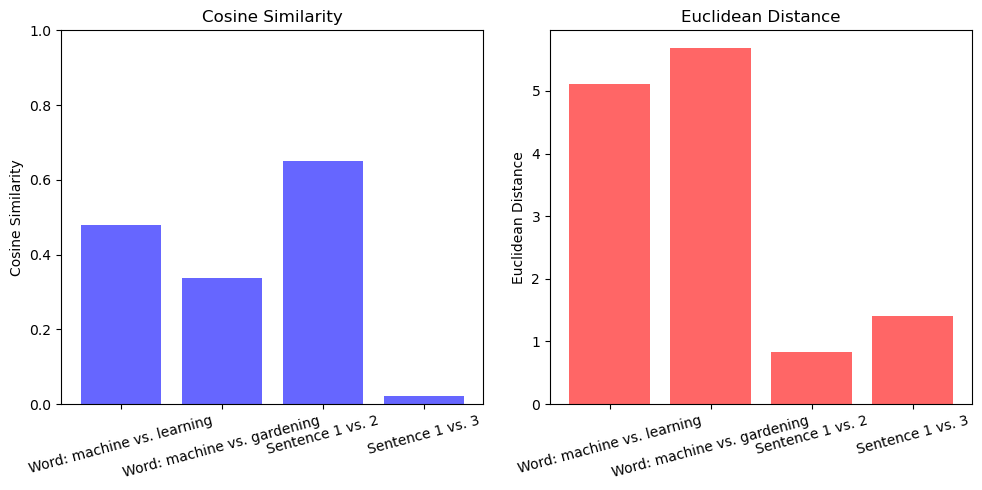

In [28]:
# Visualization
labels = ["Word: machine vs. learning", "Word: machine vs. gardening", 
          "Sentence 1 vs. 2", "Sentence 1 vs. 3"]
cosine_scores = [word_cos_12, word_cos_13, sent_cos_12, sent_cos_13]
euclidean_scores = [word_dist_12, word_dist_13, sent_dist_12, sent_dist_13]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(labels, cosine_scores, color='blue', alpha=0.6)
plt.title("Cosine Similarity")
plt.ylabel("Cosine Similarity")
plt.xticks(rotation=15)
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
plt.bar(labels, euclidean_scores, color='red', alpha=0.6)
plt.title("Euclidean Distance")
plt.ylabel("Euclidean Distance")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

## Semantic Search: The AI-Powered Evolution of Retrieval

**Semantic search** is an advanced retrieval search technique that focuses on understanding the meaning and intent behind a user’s query, rather than relying solely on keyword matches. By leveraging embeddings (e.g., from Sentence-BERT) and similarity metrics like cosine similarity, semantic search retrieves items (e.g., documents, images, or products) that are conceptually relevant, even if they don’t share exact words with the query.

### Key Concepts
- **Traditional Search**: Relies on keyword-based methods like Bag of Words (BoW) or TF-IDF, matching exact terms between queries and documents. This can miss relevant results if synonyms or related concepts are used (e.g., “car” vs. “automobile”).
- **Semantic Search**:
  - Uses **embeddings** (e.g., Word2Vec, BERT) to represent queries and items as dense vectors that capture meaning.
  - Measures similarity (often with cosine similarity) to rank items based on semantic closeness.
  - Handles synonyms, paraphrases, and context, making it more intuitive and user-friendly.
- **Example**: A query like “best AI tools” might retrieve documents about “machine learning software” or “artificial intelligence platforms” because their embeddings are close in the vector space, even without exact word matches.

### How It Works
1. Convert the query and items (e.g., documents) into embeddings using a model like Sentence-BERT.
2. Compute cosine similarity between the query embedding and item embeddings.
3. Rank items by similarity score, returning the most relevant results.

### Real-World Applications
- **Search Engines**: Google and other engines use semantic search to return results that match user intent (e.g., searching “how to fix a flat tire” might return guides on “repairing a puncture”).
- **E-commerce**: Recommending products based on descriptions or user queries (e.g., “comfortable running shoes” retrieves similar items even if described differently).
- **Chatbots and QA Systems**: Finding answers that match the meaning of a user’s question, not just keywords.

### Journey from Mathematics to AI
Semantic search builds on the mathematical foundation of vectors and similarity metrics (Steps 1–8). By combining dense embeddings with cosine similarity, it enables AI systems to understand and retrieve information based on meaning, marking a significant leap from simple keyword matching to intelligent, context-aware search.

In [37]:
# Sample query and documents
query = ["Best AI tools for developers"]
documents = [
    "Machine learning is fun",
    "AI and machine learning are powerful tools for developers",
    "Gardening is relaxing",
    "Top artificial intelligence platforms for coding"
]

# Load Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings
query_embedding = model.encode(query)
doc_embeddings = model.encode(documents)

# Compute cosine similarities
similarities = cosine_similarity(query_embedding, doc_embeddings)[0]

# Rank documents by similarity
ranked_indices = np.argsort(similarities)[::-1]  # Sort in descending order
print("Semantic Search Results:")
print(f"Query: {query[0]}")
print("\nRanked Documents:")
for i, idx in enumerate(ranked_indices):
    print(f"Rank {i+1}: {documents[idx]} (Cosine Similarity: {similarities[idx]:.4f})")

Semantic Search Results:
Query: Best AI tools for developers

Ranked Documents:
Rank 1: AI and machine learning are powerful tools for developers (Cosine Similarity: 0.7536)
Rank 2: Top artificial intelligence platforms for coding (Cosine Similarity: 0.5765)
Rank 3: Machine learning is fun (Cosine Similarity: 0.3976)
Rank 4: Gardening is relaxing (Cosine Similarity: 0.0225)


### Example: Semantic Search with Sentence-BERT

In the code above, we implemented a simple semantic search system:
- **Query**: “Best AI tools for developers”
- **Documents**: Four texts, two related to AI and one about gardening.
- **Method**:
  - We used the `all-MiniLM-L6-v2` Sentence-BERT model to convert the query and documents into 384-dimensional embeddings.
  - We computed cosine similarity between the query embedding and each document embedding.
  - Documents were ranked by similarity score, with higher scores indicating greater relevance.

**Expected Output**:
- Documents like “AI and machine learning are powerful tools for developers” and “Top artificial intelligence platforms for coding” should rank higher due to their semantic similarity to the query.
- The gardening document should rank lower, as it’s unrelated.

**Key Insight**: Semantic search leverages embeddings to capture meaning, allowing it to retrieve relevant documents even if they use different wording (e.g., “AI tools” vs. “artificial intelligence platforms”). Cosine similarity ensures robust ranking by focusing on vector direction, aligning with the needs of AI-driven search systems.

Semantic search exemplifies the journey from mathematics to AI, transforming vector representations and similarity metrics into intelligent systems that understand user intent, revolutionizing how we retrieve information.

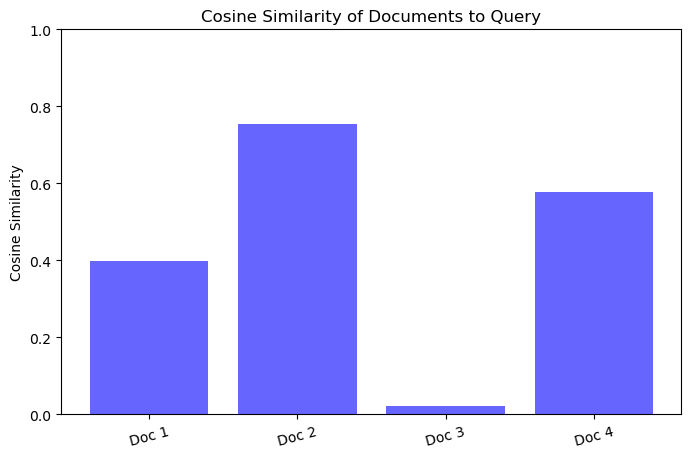

In [29]:

# Plot cosine similarities
plt.figure(figsize=(8, 5))
plt.bar(range(len(documents)), similarities, color='blue', alpha=0.6)
plt.xticks(range(len(documents)), [f"Doc {i+1}" for i in range(len(documents))], rotation=15)
plt.title("Cosine Similarity of Documents to Query")
plt.ylabel("Cosine Similarity")
plt.ylim(0, 1)
plt.show()

## Conclusion

This technical tutorial has walked through the evolution from mathematical vectors to AI-driven semantic search. Starting with basic vector operations and similarity metrics (Steps 1–5), we explored text vectorization using Bag of Words, TF-IDF, and embeddings (Steps 6–7), and applied these to compare Euclidean distance and cosine similarity (Step 8). Finally, we demonstrated semantic search (Step 9), showing how cosine similarity and embeddings enable AI to retrieve relevant items based on meaning. This journey highlights how mathematical foundations power modern AI applications, transforming how we search and interact with information.